In [3]:
import pandas as pd
import yfinance as yf

# Download sample data
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-01-01', end='2024-07-01', group_by='ticker')
data.head()

/var/folders/w2/dc57qd1j0xl0wbkdcf14hmzm0000gn/T/ipykernel_68131/2868269645.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2024-01-01', end='2024-07-01', group_by='ticker')
[*********************100%***********************]  3 of 3 completed


Ticker            AAPL                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  185.789422  187.070052  182.553128  184.290405  82488700   
2024-01-03  182.880757  184.528693  182.096492  182.910538  58414500   
2024-01-04  180.825785  181.758954  179.565029  180.587540  71983600   
2024-01-05  180.666948  181.431339  178.860172  179.862823  62379700   
2024-01-08  180.766224  184.250716  180.180517  184.210999  59144500   

Ticker           GOOGL                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2024-01-02  137.724022  138.618651  135.666356  137.346283  23711200   
2024-01-03  136.431755  138.797571  136.262770  138.091797  24212100   
2024-01-04  137.594801  138.330395  135.537149  135.576904  27137700   
2024-01-05  135.934746  136.342305  134.344278  134.920822  22513900   
2024-01-08  135.477482  138.181268  135.447663  138.012283  21404000   

Ticker            MSFT                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2024-01-02  369.663767  371.680878  362.653349  366.707336  25258600  
2024-01-03  364.868279  369.070578  364.373891  366.440430  23083500  
2024-01-04  366.509611  368.912329  363.048895  363.810242  20901500  
2024-01-05  364.828714  367.884029  362.386436  363.622406  21004600  
2024-01-08  365.155010  370.988813  364.868286  370.484528  23134000

In [4]:
# Stack the data into a flat DataFrame
df_list = []
for ticker in tickers:
    df = data[ticker].copy()
    df.insert(0, 'Ticker', ticker)
    df.insert(0, 'Date', df.index)
    df_list.append(df)

flat_df = pd.concat(df_list)
flat_df.reset_index(drop=True, inplace=True)
flat_df.index.name = ''
display(flat_df)

Price,Date,Ticker,Open,High,Low,Close,Volume
,,,,,,,
0,2024-01-02,AAPL,185.789422,187.070052,182.553128,184.290405,82488700
1,2024-01-03,AAPL,182.880757,184.528693,182.096492,182.910538,58414500
2,2024-01-04,AAPL,180.825785,181.758954,179.565029,180.587540,71983600
3,2024-01-05,AAPL,180.666948,181.431339,178.860172,179.862823,62379700
4,2024-01-08,AAPL,180.766224,184.250716,180.180517,184.210999,59144500
...,...,...,...,...,...,...,...
367,2024-06-24,GOOGL,179.291504,180.017981,177.808682,178.356033,18298000
368,2024-06-25,GOOGL,178.754093,183.401579,178.555061,183.142838,23130200
369,2024-06-26,GOOGL,181.749587,183.620513,181.600301,182.993561,19839000


In [5]:
# Suppose you want to see the **average volume** each month for each stock. Let’s first add a 'Month' column:
flat_df['Month'] = flat_df['Date'].dt.to_period('M')
display(flat_df)

Price,Date,Ticker,Open,High,Low,Close,Volume,Month
,,,,,,,,
0,2024-01-02,AAPL,185.789422,187.070052,182.553128,184.290405,82488700,2024-01
1,2024-01-03,AAPL,182.880757,184.528693,182.096492,182.910538,58414500,2024-01
2,2024-01-04,AAPL,180.825785,181.758954,179.565029,180.587540,71983600,2024-01
3,2024-01-05,AAPL,180.666948,181.431339,178.860172,179.862823,62379700,2024-01
4,2024-01-08,AAPL,180.766224,184.250716,180.180517,184.210999,59144500,2024-01
...,...,...,...,...,...,...,...,...
367,2024-06-24,GOOGL,179.291504,180.017981,177.808682,178.356033,18298000,2024-06
368,2024-06-25,GOOGL,178.754093,183.401579,178.555061,183.142838,23130200,2024-06
369,2024-06-26,GOOGL,181.749587,183.620513,181.600301,182.993561,19839000,2024-06


In [7]:
# Pivot table: Average Volume for each ticker per month
pivot = pd.pivot_table(flat_df,
                       values='Volume',
                       index='Month',
                       columns='Ticker',
                       aggfunc='mean',
                      margins='all')
print(pivot)

Ticker           AAPL         GOOGL          MSFT           All
Month                                                          
2024-01  5.654718e+07  2.770814e+07  2.516625e+07  3.647386e+07
2024-02  5.807768e+07  3.238119e+07  2.220456e+07  3.755448e+07
2024-03  7.165759e+07  3.363578e+07  2.132226e+07  4.220521e+07
2024-04  5.664291e+07  2.999311e+07  2.004926e+07  3.556176e+07
2024-05  6.075051e+07  2.465393e+07  1.880818e+07  3.473754e+07
2024-06  9.041853e+07  2.421625e+07  1.798511e+07  4.420663e+07
All      6.518390e+07  2.874640e+07  2.093233e+07  3.828754e+07


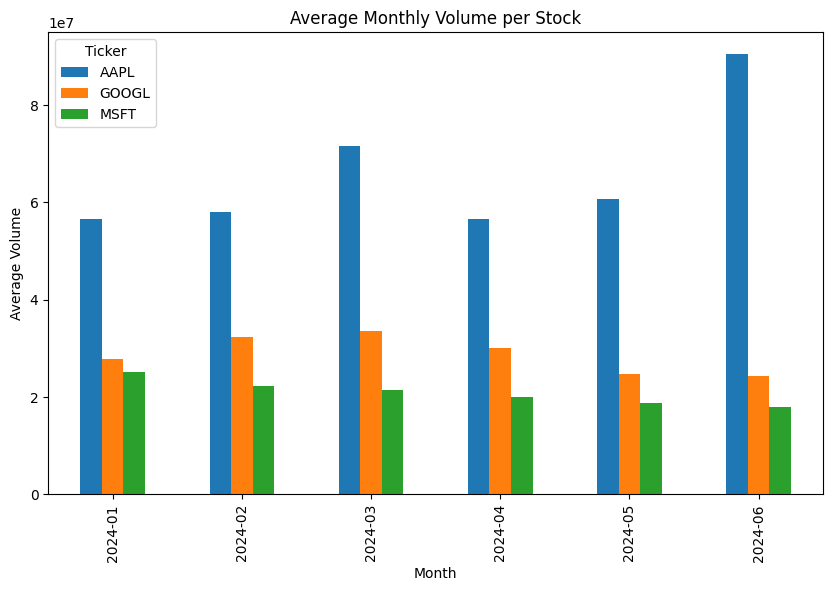

In [5]:
pivot.plot(kind='bar', figsize=(10, 6), ylabel='Average Volume')
import matplotlib.pyplot as plt
plt.title('Average Monthly Volume per Stock')
plt.show()